In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [89]:
df = pd.read_csv("Ice_cream selling data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [90]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


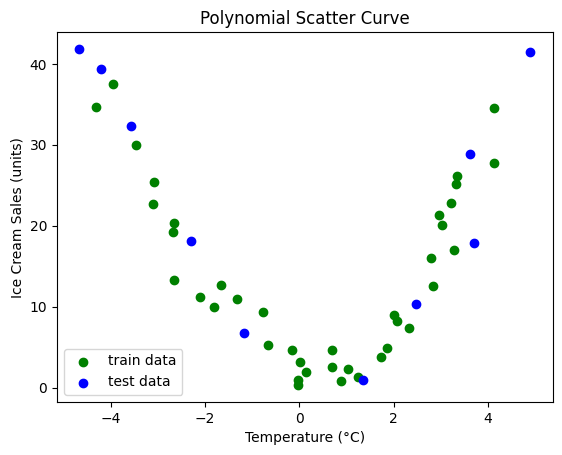

In [91]:

X = df['Temperature (°C)']
Y = df['Ice Cream Sales (units)']

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2 ,random_state=40)
plt.scatter(X_train,y_train,color='g',label= "train data")
plt.scatter(X_test,y_test,color='b', label = 'test data')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Polynomial Scatter Curve")
plt.legend()
plt.legend()
plt.show()

In [92]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train.to_numpy().reshape(-1,1))
X_test_poly = poly.transform(X_test.to_numpy().reshape(-1,1))

In [93]:
l = LinearRegression()
l.fit(X_train_poly,y_train)

LinearRegression()

In [94]:
y_pred = l.predict(X_test_poly)
error = mean_absolute_percentage_error(y_pred,y_test)
print(error)

0.20986358490142312


In [95]:
r2 = r2_score(y_pred,y_test)
print(r2)

0.9213299122410827


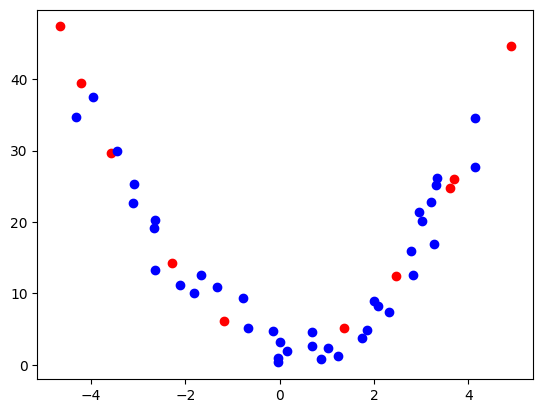

In [96]:
plt.scatter(X_test,y_pred,color='r')
plt.scatter(X_train,y_train,color='b')

plt.show()

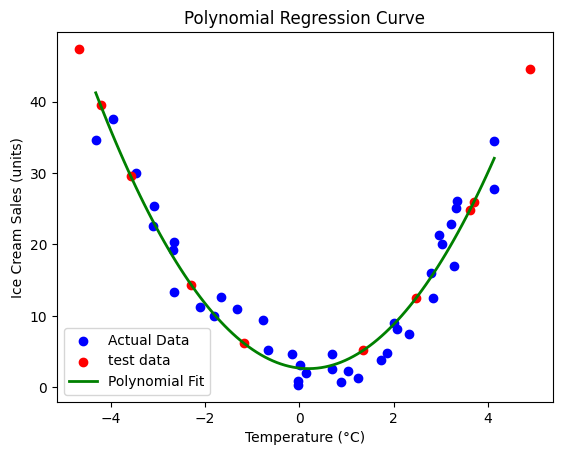

In [97]:
X_curve = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve) 
y_curve = l.predict(X_curve_poly)
plt.scatter(X_train, y_train, color='blue', label="Actual Data")
plt.scatter(X_test,y_pred,color='r',label="test data")

plt.plot(X_curve, y_curve, color='g', label="Polynomial Fit", linewidth=2)

plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Polynomial Regression Curve")
plt.legend()
plt.show()